In [1]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [2]:
# Target User Accounts
news_org = ['@BBC', '@CBS', '@CNN', '@FoxNews', '@nytimes']

# List for dictionaries of results
sentiment =[]

#  Loop through tweets (total 100 tweets)

for news in news_org:
    
    # Counter
    counter = 1
    
    for item in tweepy.Cursor(api.user_timeline, id=news).items(100):
        
        tweet = json.dumps(item._json, indent=3)
        tweet = json.loads(tweet)
        text = tweet['text']
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(text)["compound"]
        pos = analyzer.polarity_scores(text)["pos"]
        neu = analyzer.polarity_scores(text)["neu"]
        neg = analyzer.polarity_scores(text)["neg"]
        
        # Add sentiments for each tweet into a list
        newsmood = {
            'source':news,
            'date': tweet["created_at"],
            'text':text,
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'tweets ago': counter}
        
        sentiment.append(newsmood)
        
        # Add to counter 
        counter +=1

In [3]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiment)
sentiments_pd.head()

,compound,date,negative,positive,source,text,tweets ago
0,0.2263,Thu Sep 27 17:02:07 +0000 2018,0.089,0.155,@BBC,This is the quiz where you have to play the an...,1
1,-0.1280,Thu Sep 27 16:03:09 +0000 2018,0.067,0.000,@BBC,Got a bag of frozen peas lurking at the back o...,2
2,-0.5574,Thu Sep 27 15:31:07 +0000 2018,0.194,0.000,@BBC,"John Cunliffe, creator of Postman Pat and Rosi...",3
3,0.5719,Thu Sep 27 15:06:35 +0000 2018,0.000,0.171,@BBC,Flying squirrels are secretive creatures but i...,4
4,-0.4201,Thu Sep 27 14:03:05 +0000 2018,0.117,0.000,@BBC,"""It's very difficult not to tie your self-wort...",5


In [4]:
#Export data to CSV file
exported_data=sentiments_pd.to_csv('NewsMood.csv')

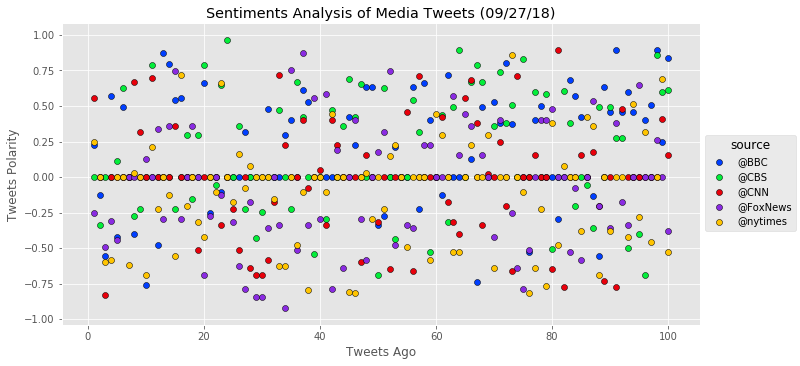

In [5]:
#Sentiments Analysis of Media Tweets
sentiments_figure = sns.FacetGrid(data=sentiments_pd, hue='source', aspect=2, size=5, palette='bright')
sentiments_figure.map(plt.scatter, 'tweets ago', 'compound',edgecolor="black").add_legend()
plt.xlabel ('Tweets Ago')
plt.ylabel ('Tweets Polarity')
plt.title ('Sentiments Analysis of Media Tweets (09/27/18)')
plt.savefig('Sentiments Analysis of Media Tweets')
plt.show()

In [6]:
sentiments_groupby = sentiments_pd.groupby('source').mean()
sentiments_groupby.reset_index(inplace=True)
sentiments_groupby

,source,compound,negative,positive,tweets ago
0,@BBC,0.172606,0.03743,0.09972,50.5
1,@CBS,0.151459,0.03676,0.09673,50.5
2,@CNN,-0.016845,0.05810,0.05529,50.5
3,@FoxNews,-0.061182,0.09428,0.06872,50.5
4,@nytimes,-0.108302,0.07641,0.04217,50.5


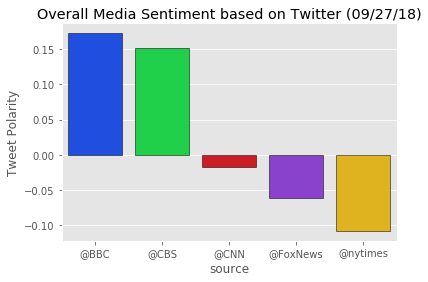

In [7]:
sns.barplot(data=sentiments_groupby, x='source', y='compound',palette='bright',edgecolor="black")
plt.title('Overall Media Sentiment based on Twitter (09/27/18)')
plt.ylabel('Tweet Polarity')
plt.savefig('Overall Media Sentiment based on Twitter')
plt.show()